In [35]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
boston= load_boston() #boston housing prices very old data

In [37]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [38]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [39]:
df = pd.DataFrame(boston['data'])

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
df.columns = boston['feature_names']

In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
df['Price'] = boston['target']

In [44]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/panchajanyamysarla/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


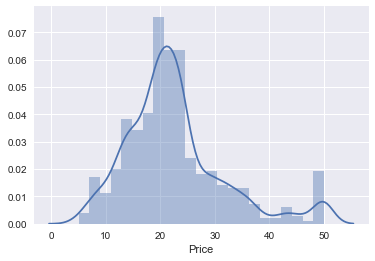

In [45]:
sns.distplot(df['Price']) #distrubution plot 

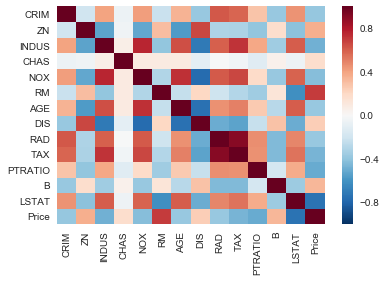

In [46]:
sns.heatmap(df.corr())

In [47]:
X= df.drop('Price', axis=1)    
y= df['Price']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [50]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

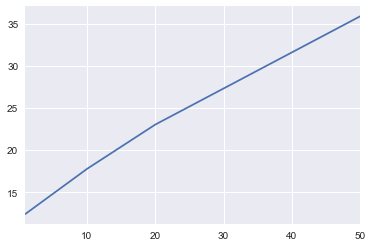

In [51]:

#One instance 

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
n_estimates = [1,10,50,300,500,600]
minleaves = [1,10,20,50]
ridge=[]
for minleaf in minleaves:  
    clfRidge = RandomForestRegressor(n_estimators=300,min_samples_leaf=minleaf)
    clfRidge.fit(X_train, y_train)
    ridge.append(mean_squared_error(y_true = y_test, y_pred = clfRidge.predict(X_test)))
ridge = pd.Series(ridge, index = minleaves)
ridge.plot();

In [52]:
#Below args values are choosen by looping through a set of values and minimizing the error using the above sample code.
rfmodel = RandomForestRegressor(n_estimators=200)

abmodel = AdaBoostRegressor(n_estimators=100,learning_rate=2)

gbmodel = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)

In [53]:
rfmodel.fit(X_train,y_train)
abmodel.fit(X_train,y_train)
gbmodel.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [54]:
rfpred= rfmodel.predict(X_test)
abpred= abmodel.predict(X_test)
gbpred= gbmodel.predict(X_test)

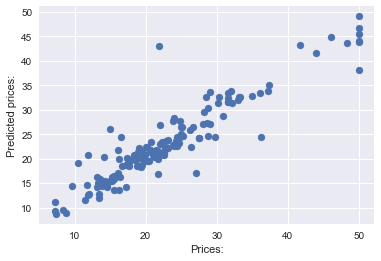

In [55]:
plt.scatter(y_test,rfpred)
plt.xlabel("Prices:")
plt.ylabel("Predicted prices:")

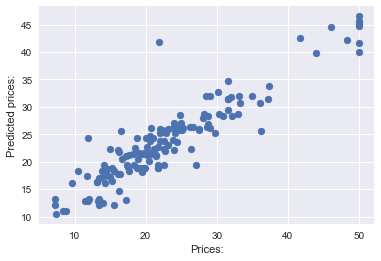

In [56]:
plt.scatter(y_test,abpred)
plt.xlabel("Prices:")
plt.ylabel("Predicted prices:")

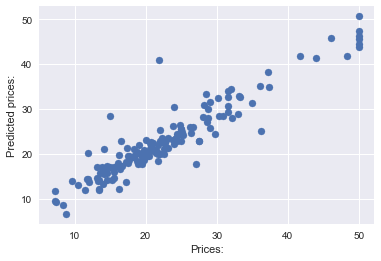

In [57]:
plt.scatter(y_test,gbpred)
plt.xlabel("Prices:")
plt.ylabel("Predicted prices:")

In [58]:
from sklearn import metrics

In [59]:
metrics.mean_squared_error(y_test,rfpred)

12.348882366776312

In [60]:
metrics.mean_squared_error(y_test,abpred)

15.102591317787127

In [61]:
metrics.mean_squared_error(y_test,gbpred)

10.96070863538149

In [62]:
metrics.r2_score(y_test,rfpred)

0.85840963716820984

In [63]:
metrics.r2_score(y_test,abpred)

0.82683603901363023

In [64]:
metrics.r2_score(y_test,gbpred)

0.87432622107142688

In [65]:
np.sqrt(metrics.mean_squared_error(np.log(y_test),np.log(gbpred)))

0.15406558929217218

In [66]:
np.sqrt(metrics.mean_squared_error(np.log(y_test),np.log(gbpred)))

0.15406558929217218

In [67]:
np.sqrt(metrics.mean_squared_error(np.log(y_test),np.log(gbpred)))

0.15406558929217218